In [ ]:
%%HTML
<!-- Make fonts readable at 1024x768 -->
<style>
.rendered_html { font-size:0.5em; }
</style>

In [1]:
# Optional: Set options for slide theme and transition
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/phuijse/.jupyter/nbconfig/"
cm = BaseJSONConfigManager(config_dir=path)
cm.update('livereveal', {
    'theme': 'simple',
    'transition': 'fast',
    'start_slideshow_at': 'selected',
    'width': 1024,
    'height': 768,
    'scroll': True,
    'center': False
});

In [2]:
# Imports and matplotlib configuration
import numpy as np
import scipy.signal
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import animation, rcParams
from ipywidgets import interact, FloatSlider, IntSlider, SelectionSlider, Layout, Button, Output, Box
from IPython.display import display, Audio, HTML
import soundfile as sf
# Default options for matplotlib plots
rcParams['figure.dpi'] = 80
rcParams['font.size'] = 14
rcParams['axes.grid'] = True
rcParams['lines.linewidth'] = 2.0
rcParams['legend.framealpha'] = 0.5
rcParams['legend.fontsize'] = 'medium'
rcParams['figure.titlesize'] = 'medium'
rcParams['figure.autolayout'] = True
# rcParams['animation.html'] = 'html5'
slider_layout = Layout(width='600px', height='20px')
slider_style = {'description_width': 'initial'}
from functools import partial
FloatSlider_nice = partial(FloatSlider, style=slider_style, layout=slider_layout, continuous_update=False)
IntSlider_nice = partial(IntSlider, style=slider_style, layout=slider_layout, continuous_update=False)
SelectionSlider_nice = partial(SelectionSlider, style=slider_style, layout=slider_layout, continuous_update=False)

### Universidad Austral de Chile 
## INFO183: Análisis de sistemas lineales


# Unidad 1: Introducción al procesamiento digital de señales

### Dr. Pablo Huijse, phuijse at inf dot uach dot cl 

### <a href="https://github.com/phuijse/UACH-INFO183"> github.com/phuijse/UACH-INFO183 </a>


# Contenidos

1. [Conceptos básicos de señales](#section11)
1. [Clasificación y propiedades de las señales](#section12)
1. [Muestreo y digitalización de señales](#section13)
1. [Esquema general DSP](#section14)



# Bibliografía

1. Alan V. Oppenheim y Alan S. Willsky, “Señales y Sistemas”, 2da edición, *Prentice Hall*, 1998, **BM621.382 OPP**
2. Alan V. Oppenheim y Ronald. W. Schafer, “Tratamiento de señales en tiempo discreto”, 3ra edición, *Pearson*, 2000, **BM621.382 OPPt**
3. Jonathan Y. Stein, “Digital Signal Processing: A Computer Science Perspective”, *John Wiley and Sons*, 2000
4. Monson H. Hayes, “Digital Signal Processing”. 2da edición, *Mc Graw Hill*, 2011




<a id='section11'></a>

# 1. Conceptos básicos de señales


¿Qué es una señal?
- Describe o representa el comportamiento de un fenómeno físico o sistema
- Patrón que exhibe variabilidad en tiempo, espacio u otra variable independiente


<img class="displayed" src="img/signal-ipsa.png">

<img src="img/signal-electric.gif">

<img src="img/signal-clock.png">

<img class="displayed" src="img/signal-transit.gif">

<img src="img/signal-audio.gif">

<img class="displayed" src="img/signal-eeg.png">

<img src="img/signal-weather.gif">

<img src="img/signal-bunny.gif">

**Procesamiento de señales** 

Disciplina que se decida al diseño de **sistemas** para la/el :
- representación,
- filtrado,
- codificación,
- transmisión,
- estimación,
- detección,
- inferencia,
- descubrimiento,
- reconocimiento,
- síntesis,
- reproducción,
- ...

de las señales. 


1. Jose S.F. Moura, "What is signal processing", *IEEE signal processing magazine*, DOI: <a href="https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=5230869">10.1109/MSP.2009.934636 </a>

<a id="section12"></a>

# Clasificación y propiedades de las señales

- Una señal se representa matematicamente como una **función** (f)
$$
y = f(x)
$$
$$
x \mapsto f(x)
$$
$$
f: \mathcal{X} \rightarrow \mathcal{Y}, \quad x \in \mathcal{X} \wedge y \in \mathcal{Y},
$$
donde:
    - $x$ se llama **variable independiente**, **entrada** o **argumento** y su espacio se llama **dominio**
    - $y$ se llama **variable dependiente**, **salida** o **retorno** y su espacio se llama **codominio**

¿Qué es una **función**?
- Una función es una relación entre la variable independiente $x$ y dependiente $y$ 
    - Para cada $x$ existe un y solo un $y$ asociado
    - Puede haber más de una variable dependiente/indepediente


- **Ejemplos de variable independiente:** tiempo, coordenadas espaciales
    - Cuando una señal/función cambia en el tiempo hablamos de una **serie de tiempo**

### Clasificación según tipo de variable

A grandes rasgos podemos clasificar las señales como:

- Variable independiente continua
- Variable independiente discreta
- Variable dependiente continua: **Señal analógica**
- Variable dependiente discreta o cuantizada: **Señal digital**

¿Cómo se clasifican los ejemplos de señal que vimos recientente?



<img src="img/signal-classification1.png">

- Los computadores trabajan con **señales digitales de tiempo discreto**
- Los señales "naturales" son en general analógicas de tiempo continuo
- Para trabajar con señales analógicas en nuestro computador:
    - Se discretiza en el tiempo **muestreando** según el reloj del sistema, por ejemplo:
$$
x_A(t=kT_S) = x[n], \quad n \in \mathbb{Z}
$$
    - Se cuantiza la amplitud, por ejemplo:
$$
v_D = \begin{cases} 0 & v_A \in [0.0, 0.8] V \\ 1 & v_A \in [2.0, 5.0] V\end{cases}
$$


- Una señal discreta es una secuencia de valores indexada por un entero
    

In [ ]:
plt.close('all'); fig, ax = plt.subplots(1, 3, figsize=(8, 3))
x = np.linspace(0.0, 2.0, num=1000)
y = np.sin(2.0*np.pi*1.0*x)
ax[0].plot(x, y)
ax[1].plot(x, np.floor(y//0.249))
ax[2].stem(x[::20], np.floor(y[::20]//0.249));

### Funciones típicas

Impulso unitario:
$$
\delta[n] = \begin{cases} 1 & n=0\\ 0 & n \neq 0 \end{cases}
$$
Escalo unitario:
$$
u[n] = \sum_{k=0}^\infty \delta[n-k] = \begin{cases} 1 & n\geq 0\\ 0 & n < 0 \end{cases} 
$$
Propiedad: $\delta[n] = u[n] - u[n-1]$

Función exponencial real:
$$
y[n] = C e^{\alpha n}
$$

Función exponencial compleja:
$$
y[n] = e^{jn\omega} = \Re [e^{jn\omega}] + j \Im[e^{jn\omega}]  = \cos(n\omega) + j \sin (n\omega)
$$

Función exponencial compleja general:
$$
y[n] = |C|e^{\alpha n + j\omega n + j\phi} = |C|e^{\alpha n} [\cos(\omega n + \phi) + j\sin(\omega n + \phi)]
$$
Función Gaussiana
$$
y[n] = e^{- \alpha (n-n_0)^2}, \alpha> 0
$$

In [ ]:
plt.close('all'); fig, ax = plt.subplots(2, 3, figsize=(10, 6))
x = np.linspace(-10, 10, num=1000)
ax[0, 0].plot(x, x, label='y = x');  
ax[0, 0].plot(x, np.absolute(x), label='y = |x|', linestyle='--');  ax[0, 0].legend()
ax[0, 1].plot(x[x>0], np.sqrt(x[x>0]), label='y = sqrt(x)'); 
ax[0, 1].plot(x[x>0], np.log(x[x>0]), label='y = log(x)', linestyle='--');  ax[0, 1].legend();
ax[0, 2].plot(x, np.exp(0.25*x), label='y = exp(x/4)');
ax[0, 2].plot(x, np.exp(-0.25*x), label='y = exp(-x/4)', linestyle='--');  ax[0, 2].legend(); 
ax[1, 0].plot(x, np.cos(x), label='y=cos(x)')
ax[1, 0].plot(x, np.sin(x), label='y=sin(x)', linestyle='--'); ax[1, 0].legend(loc=1)
ax[1, 1].plot(x, np.heaviside(x, 0), label='y=step(x)'); 
ax[1, 1].plot(x, 1.0/(1.0+np.exp(-x)), label='y=logit(x)', linestyle='--'); ax[1, 1].legend(loc=1)
ax[1, 2].plot(x, scipy.signal.unit_impulse(len(x), 'mid'), label='y=delta(x)');
ax[1, 2].plot(x, np.exp(-0.5*x**2), label='y=exp(-x^2)', linestyle='--'); ax[1, 2].legend(loc=1);

In [ ]:
plt.close('all'); fig, ax = plt.subplots(3, 1, figsize=(8, 5))
x = np.linspace(-2, 2, num=500)
line0, = ax[0].plot(x, np.cos(2.0*np.pi*x)); ax[0].set_title('Sinusoidal')
line1, = ax[1].plot(x, scipy.signal.sawtooth(2.0*np.pi*x));  ax[1].set_title('Diente de sierra')
line2, = ax[2].plot(x, scipy.signal.square(x));  ax[2].set_title('Cuadrada');

def update(k = 1): 
    arg = 2.0*np.pi*(x - k*0.01)
    line0.set_ydata(np.cos(arg))
    line1.set_ydata(scipy.signal.sawtooth(arg))
    line2.set_ydata(scipy.signal.square(arg))
anim = animation.FuncAnimation(fig, update, frames=100, interval=20, blit=True)

In [ ]:
plt.close('all'); fig, ax = plt.subplots(3, 1, figsize=(8, 5))
x = np.linspace(-14, 14, num=1000)
ax[0].plot(x, np.exp(-0.1*x)*np.cos(2.0*np.pi*x));
ax[1].plot(x, np.exp(0.1*x)*np.cos(2.0*np.pi*x));
ax[2].plot(x, np.exp(-0.01*x**2)*np.cos(2.0*np.pi*x));

### Algunas propiedades de las funciones

- Función par o simétrica: 
$$f(x) = f(-x) $$
- Función inpar o antisimétrica: 
$$f(x) = -f(-x) $$
- Función periódica: 
$$\exists ~ T ~\text{tal que}~ f(x) = f(x+T) $$
- Función lineal (adición vectorial y multiplicación escalar): 
$$f(ax + by) = a f(x) + b f(y),$$
con $a$, $b$ coeficientes escalares 


In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(-10, 10, num=1000)
ax.plot(x, -(-x)**3, label='y = x');  

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
t = np.linspace(-6, 6, num=1000)
x = np.sin(2*np.pi*1*t)
line = ax.plot(t, x)
def update(k = 1): 
    line[0].set_ydata(np.sin(2*np.pi*0.01*k*t));
    ax.set_title("Frequency: %0.2f [Hz]" %(0.01*k))
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True) 

### Propiedades de las señales

- Siempre trabajaremos con señales que dentro de un rango de interés observado son **acotadas** en energía, potencia y/o en ancho de banda dentro. 
    - Es decir son señales finitas (no divergen ni se vuelven singulares)

- El rango en que una señal varía se conoce como su **rango dinámico**

- La **energía** de una señal mide su "tamaño" o el "espacio que ocupa". Para una señal analógica y discreta, respectivamente
$$
E_s = \int_{-\infty}^\infty |s(t)|^2 \,dt  \qquad E_s = \sum_{n=-\infty}^\infty |s[n]|^2 
$$
    - Una señal acotada en energía debe cumplir $E_s < \infty$

- La **potencia** promedio de una señal se define como su energía por unidad de tiempo
$$
P_s = \lim_{T\to \infty} \frac{1}{2T} \int_{- T}^{T} |s(t)|^2 \,dt  \qquad P_s = \lim_{N\to \infty} \frac{1}{2N+1} \sum_{n = - N}^{N} |s[n]|^2 
$$
    - Una señal acotada en potencia debe cumplir $P_s < \infty$
    - Una señal de energía finita tiene potencia cero
    - Una señal de potencia finita tiene duración infinita

- El **ancho de banda** de una señal mide su tasa de cambio o velocidad
    - Una señal acotada en **ancho de banda** debe tener transiciones suaves

¿Cual es la energía de esta señal?
$$
s(t) = \begin{cases} 0 & t < 0 \\ 2e^{-t/2} & t \geq 0\end{cases}
$$

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
dt=0.001; x = np.arange(-5, 20, step=dt)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
ax.plot(x, y)
print((y**2).sum()*dt);

### Transformaciones simples 
- Traslación y escalamiento de la variable independiente

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
x = np.arange(-20, 20, step=.1)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
line = ax.plot(x, y); ax.set_xlim(-5, 20)
def update(m=0):
    y_translation = np.roll(y, 10*m)
    line[0].set_ydata(y_translation)
interact(update, m=IntSlider_nice(description="Translation", value=0, min=-10, max=10));

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
x = np.arange(-20, 20, step=0.1)
y = np.zeros(shape=(x.shape))
y[x>=0] = 2*np.exp(-x[x>=0]/2)
line = ax.plot(x, y); ax.set_xlim(-5, 20)
def update(m=0):
    y[x>=0] = 2*np.exp(-m*x[x>=0]/2)
    line[0].set_ydata(y)
interact(update, m=FloatSlider_nice(description="Scaling", value=1, min=0.1, max=2));

## Clasificación según características de la señal

- **Señal determinista:** Puede describirse completamente por una ecuación matemática
    - Se puede subclasificar como periódica o aperiódica

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
x = np.linspace(-10, 10, num=1000)
ax.plot(x, np.cos(x)*np.sin(2*x) + 0.1*x);  

- **Señal estocástica:** Se describe probabilisticamente, es decir en términos de su densidad de probabilidad.
    - Ejemplo: $z \in \mathbb{R}^N$ se distribuye normal con media $\mu \in \mathbb{R}^N$ y covarianza $\Sigma \in \mathbb{R}^{N\times N}$
$$ 
z \sim \mathcal{N}(\mu, \Sigma) ~~\vee~~ p(z) = \mathcal{N}(\mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d |\Sigma|}} \exp \left(-0.5 (z-  \mu)^T \Sigma^{-1} (z-  \mu) \right)
$$
    - Se puede subclasificar como estacionaria o no estacionaria
    - Formalmente se definen como **procesos aleatorios**

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 3))
np.random.seed(0)
ax.plot(np.random.multivariate_normal(np.zeros(100), np.eye(100)));  

### Variable y proceso aleatorio

**Variable aleatoria**: Variable cuyos valores posibles son resultados de un fenomeno aleatorio 
- Se describe en términos de su función de densidad de probabilidad (fdp) o distribución 
- Los valores observados a partir de la V.A. se llaman **realizaciones**
- Por lo general asumimos que las realizaciones son **iid**: independientes e identicamente distribuidas
- Usualmente se denota como $X$ y sus realizaciones como $\{x_1, x_2, \ldots, x_N\}$

**Proceso aleatorio**: Colección de V.As indexada en el tiempo
- Una realización del P.A corresponde a una serie de tiempo
- Una conjunto de realizaciones se denomina ensamble

### Distribuciones de probabilidad y momentos estadísticos 

Una distribución se describe a través de sus momentos estadísticos. Para una variable aleatoria X su momento de orden k es
$$
\mu_k = \mathbb{E} \left[X^k\right]
$$
y su momento central de orden k
$$
\hat \mu_k =\mathbb{E} \left[(X - \mathbb{E}[X])^k\right]
$$
donde la esperanza se define como
$$
\mathbb{E}[X] = \sum_n x_n p(x_n)
$$
y la media muestreal es
$$
\langle X \rangle = \frac{1}{N} \sum_{n=1}^N x_n
$$

Los momentos estadísticos más usados son la 
- Media ($\mu$): $\mu_1$ 
- Varianza ($\sigma^2$): $\hat \mu_2$ 
- Simetría: $\frac{\hat \mu_3 }{\sqrt{\hat \mu_2^3}}$
- Kurtosis: $\frac{\hat \mu_4 }{ \hat \mu_2^2}$


<img src="img/moments.png">





- Las señales **deterministas** se generan por un algoritmo o sistema no probabilístico. 
   - Son reproducibles y predecibles: conocemos su valor
- Las señales **estocásticas** se modelan como una variable aleatoria: no conocemos su valor. 
    - Sin embargo, podemos conocer el tipo y parámetros de su distribución.

In [ ]:
plt.close('all'); fig, ax = plt.subplots(1, 2, figsize=(8, 3))
x = np.linspace(-3, 3, num=100); 
np.random.seed(0)
data = np.random.randn(100)
def update(N = 1):    
    ax[0].cla(); ax[1].cla(); ax[0].set_ylim(-3, 3);
    ax[1].set_ylim(-3, 3); ax[1].set_xlim(0, 0.5);
    ax[0].plot(data[:N]); 
    ax[1].hist(data[:N], bins=10, density=True, orientation=u'horizontal'); 
    ax[1].plot(np.exp(-x**2)/np.sqrt(2.0*np.pi), x); 
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True)

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 5))
def update(seed):
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 25)
    for k in range(0, 25, 5): 
        ax.plot(100*[k], 'k--', alpha=0.5)
        data = k + np.random.randn(100);        
        #data = k + np.random.multivariate_normal(np.zeros(100), np.eye(100))
        ax.plot(data); 
interact(update, seed=IntSlider_nice(description='Random seed'));

### Proceso estacionario
- Un proceso aleatorio es una colección de variables aleatorias indexadas 
$$X^t = {X_1, X_2, X_3, \ldots, X_T}$$
- Una realización del P.A. es una serie de tiempo 
$$X^t \sim \{x_t\}_{t=1,\ldots,T} = {x_1, x_2, x_3, \ldots, x_T}$$
- Un **proceso estacionario** es aquel donde sus momentos no varían con el tiempo, *e.g.*
$$
\mathbb{E}[X_1] = \mathbb{E}[X_2] = \ldots = \mathbb{E}[X_T] 
$$
- Un **proceso ergódico** es aquel donde los momentos se pueden deducir a partir de una realización (suficientemente larga) del P.A. 
    - Esto es útil pues muchas veces observamos sólo una realización
    - Los promedios muestreales del ensamble equivalen a promedios muestreales temporales

$$
\langle x_t \rangle = \mathbb{E}[X_k] ~~\forall k
$$

<img src="img/stationary-and-ergodic.png">

## Ruido en las señales

- En la práctica no solemos observar señales puramente deterministas
- Esto se debe a la presencia del **ruido**
- El ruido es una señal puramente estocástica
- El ruido es una corrupción indeseable que modifica la señal de interés
- Un modelo clásico consiste en asumir una corrupción aditiva
$$
y[k] = x[k] + n[k],
$$
donde $y$ es la señal observada, $x$ es la señal de interés y $n$ es una señal de ruido

In [ ]:
plt.close('all'); fig, ax = plt.subplots(1, 3, figsize=(8, 3))
t = np.linspace(-10, 10, num=500)
x = np.cos(t)*np.sin(2*t) + 0.1*t
np.random.seed(0)
n = np.random.randn(len(t))
ax[0].plot(t, x); 
def update(s = 1.0):
    ax[1].cla(); ax[1].plot(t, n*s); ax[1].set_ylim(-5, 5)
    ax[2].cla(); ax[2].plot(t, x+n*s) 
    ax[2].set_title("SNR: %0.2f [dB]" %(10*np.log10(np.sum(x**2)/np.sum((n*s)**2))))
interact(update, s=FloatSlider_nice(description="Gaussian noise $\sigma$", min=0.01, max=3.0));

- Podemos cuantificar el "nivel de ruido" o la claridad de la señal observado en términos de la **razón señal a ruido** (SNR)
- La SNR se define como la razón entre la energía de la señal y la energía del ruido
- La SNR se mide en decibeles [dB]

$$
\text{SNR} = 10 \log_{10} \frac{E_x}{E_n}
$$

### Tipos de ruido
Podemos clasificar el ruido según
-  la distribución que sigue, *e.g.* ruido Gaussiano, ruido Uniforme
-  la dependencia temporal entre sus realizaciones (características espectrales), *e.g.* ruido blanco, ruido rojo


In [ ]:
plt.close('all'); fig, ax = plt.subplots(1, 2, figsize=(8, 3))
def update(N = 1.0, seed=0):
    np.random.seed(seed)
    data = np.random.uniform(low=-2, high=2, size=(10**N, 2))
    #data = np.random.normal(0, 1, size=(10**N, 2))
    #data = np.random.laplace(0, 1, size=(10**N, 2))
    ax[0].cla(); ax[1].cla();
    ax[0].set_xlim([-3, 3]); ax[0].set_ylim([-3, 3])
    ax[0].scatter(data[:, 0], data[:, 1], s=2) 
    counts, xbins, ybins = np.histogram2d(data[:, 1], data[:, 0], bins=10, range=[[-3 ,3], [-3, 3]])
    ax[1].contourf(counts, extent=[-3, 3, -3, 3])
interact(update, N=IntSlider_nice(description="log Number of realizations", min=0, max=4), 
         seed=IntSlider_nice(description='Random seed'));

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 5))
def update(seed, tau):
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 25)
    for k in range(0, 25, 5): 
        ax.plot(100*[k], 'k--', alpha=0.5)
        dt = np.repeat(np.reshape(np.arange(100), (1, -1)), 100, axis=0)
        S = np.exp(-np.absolute(dt - dt.T)/tau)
        data = k + np.random.multivariate_normal(np.zeros(100), S)
        ax.plot(data); 
interact(update, tau=FloatSlider_nice(description="Time decay", min=0.1, max=10),
         seed=IntSlider_nice(description='Random seed'));

### Reducción de ruido simple
Sea una señal periódica con ruido es aditivo, estacionario y de media cero. En este caso podemos reducir el ruido haciendo promedios de la señal de interés.

$$
\langle y \rangle = \langle x + n \rangle = \langle x  \rangle + \langle  n \rangle= \langle x \rangle
$$

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 5))
x = np.linspace(0, 10, num=1000)
def update(seed, s):
    np.random.seed(seed); ax.cla(); ax.set_ylim(-5, 35)
    data_avg = 0.0
    for k in range(0, 35, 5): 
        ax.plot([0, 10], 2*[k], 'k--', alpha=0.5, linewidth=4)
        data = scipy.signal.square(2.0*np.pi*x) + s*np.random.randn(1000);        
        data_avg += data
        ax.plot(x, k + data, alpha=0.8); 
    ax.plot([11, 21], 2*[15], 'k--', alpha=0.5, linewidth=4);
    ax.plot(11+ x, 15 + data_avg/7, 'k'); 
interact(update, seed=IntSlider_nice(description='Random seed'), 
         s=FloatSlider_nice(description='Noise $\sigma$', min=0.1, max=1.5, value=1.0));

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05
tmax, n = 100, 10000
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp
t = np.linspace(0, tmax, n)
f = scipy.integrate.odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T
plt.close('all'); fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
line = ax.plot(x, y, z, linewidth=0.5); 
"""
ax.set_xlim([np.amin(x), np.amax(x)]); ax.set_ylim([np.amin(y), np.amax(y)]); ax.set_zlim([np.amin(z), np.amax(z)]);
def update(k=0): 
    line[0].set_data(f.T); 
    line[0].set_3d_properties(f.T)
    return line
anim = animation.FuncAnimation(fig, update, frames=100, interval=100, blit=True) 
"""

## Apéndice: Procesamiento de señales de audio con Scipy y soundfile

Referencias
- https://docs.scipy.org/doc/scipy/reference/signal.html
- https://pysoundfile.readthedocs.io/en/0.9.0/

<IPython.core.display.Javascript object>


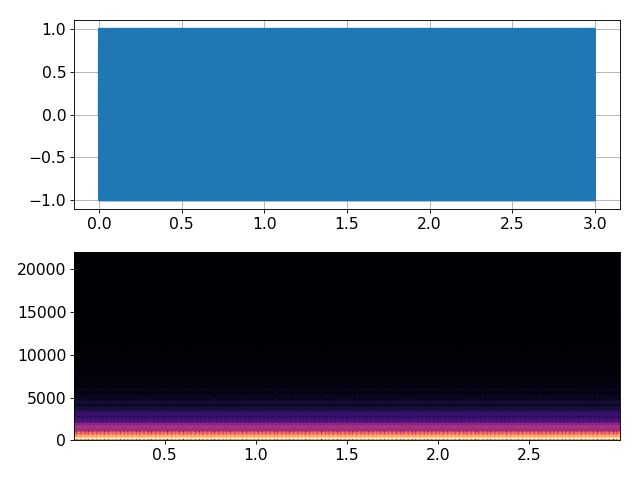

In [3]:
# Espectrograma de una sinusoide pura y de una sinusoide modulada (tremolo)
plt.close('all'); fig, ax = plt.subplots(2, figsize=(8, 6))
sample_rate = 44100; time = np.arange(0, 3, step=1.0/sample_rate)
data = np.sin(2*np.pi*220*time)#*(1.0 + np.cos(2*np.pi*4*time))*0.5 #+ 0.05*np.random.randn(len(time))
ax[0].plot(time, data);
freq, ttime, Sxx = scipy.signal.spectrogram(data, fs=sample_rate, window=('tukey', 0.25), 
                                            nperseg=256, noverlap=None, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
ax[1].pcolormesh(ttime, freq, np.log10(Sxx + 1e-5), cmap=plt.cm.magma); 
Audio(data, rate=sample_rate)

<IPython.core.display.Javascript object>


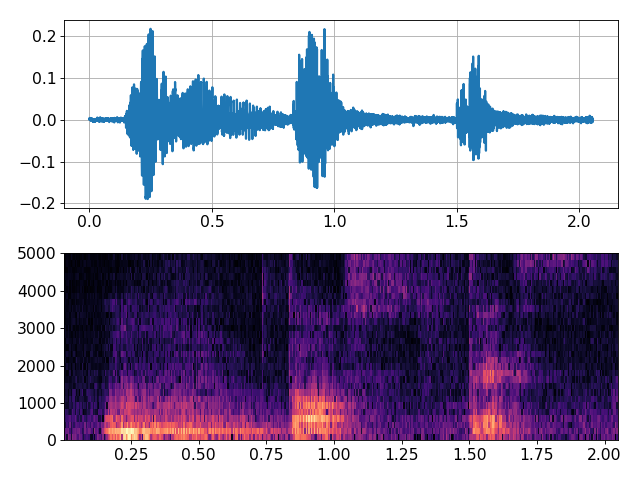

In [4]:
# Espectrograma de una señal de voz
plt.close('all'); fig, ax = plt.subplots(2, figsize=(8, 6))
data, sample_rate = sf.read("data/123.ogg")
time = np.linspace(0.0, len(data)/sample_rate, num=len(data))
ax[0].plot(time, data);
freq, ttime, Sxx = scipy.signal.spectrogram(data, fs=sample_rate, window=('tukey', 0.25), 
                                            nperseg=256, noverlap=None, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
ax[1].pcolormesh(ttime, freq, np.log10(Sxx+1e-5), cmap=plt.cm.magma); ax[1].set_ylim([0.0, 5e+3]);
Audio(data, rate=sample_rate)

<IPython.core.display.Javascript object>


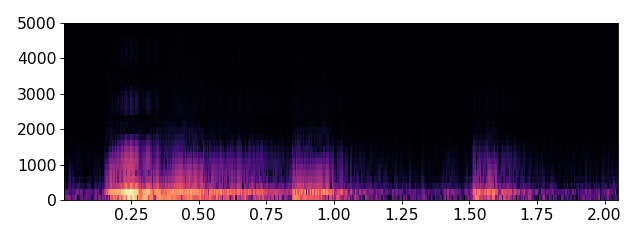

In [5]:
# Filtro de polos y zeros en frecuencia para una señal de voz
plt.close('all'); fig, ax = plt.subplots(1, figsize=(8, 3))
b, a = scipy.signal.butter(7, 0.01, btype='lowpass')
data_filt = scipy.signal.lfilter(b, a, data)

freq, ttime, Sxx = scipy.signal.spectrogram(data_filt, fs=sample_rate, window=('tukey', 0.25), 
                                            nperseg=256, noverlap=None, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
ax.pcolormesh(ttime, freq, np.log10(Sxx+1e-5), cmap=plt.cm.magma); ax.set_ylim([0.0, 5e+3]);
Audio(data_filt, rate=sample_rate)

<IPython.core.display.Javascript object>


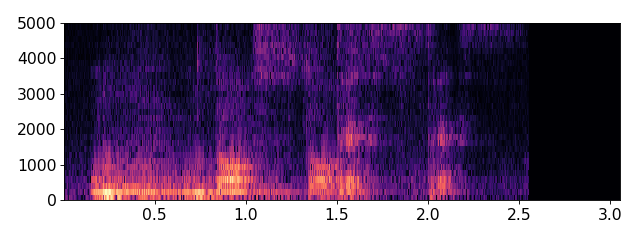

In [8]:
# Filtro de polos y zeros hecho "a mano" para dar un efecto de eco
plt.close('all'); fig, ax = plt.subplots(1, figsize=(8, 3))
b = np.zeros(shape=(sample_rate//2,)); b[0] = 1
for p in range(0, len(b)+1, len(b)):
    b[p-1] = 0.5

data_filt = scipy.signal.lfilter(b, np.array([1.0, 0.0]), np.hstack((data, np.zeros(shape=(sample_rate,)))))
freq, ttime, Sxx = scipy.signal.spectrogram(data_filt, fs=sample_rate, window=('tukey', 0.25), 
                                            nperseg=256, noverlap=None, detrend=False,
                                            return_onesided=True, scaling='density', mode='magnitude')
ax.pcolormesh(ttime, freq, np.log10(Sxx+1e-5), cmap=plt.cm.magma); ax.set_ylim([0.0, 5e+3]);
Audio(data_filt, rate=sample_rate)

In [9]:
# From: https://ipython-books.github.io/117-creating-a-sound-synthesizer-in-the-notebook/
duration, sample_rate = .25, 44000.
t = np.linspace(0., duration, int(sample_rate*duration))
synth = lambda f: np.sin(2. * np.pi * f * t)
notes = 'C,C#,D,D#,E,F,F#,G,G#,A,A#,B,C'.split(',')
freqs = 440. * 2**(np.arange(3, 3 + len(notes)) / 12.)
buttons, layout_synth = [], Layout(width='30px', height='60px', border='1px solid black')
for note, freq in zip(notes, freqs):
    button = Button(description=note, layout=layout_synth)
    def on_button_clicked(f, b):
        with Output(): # suppress the audio widget output 
            display(Audio(synth(f), rate=sample_rate, autoplay=True))
    button.on_click(partial(on_button_clicked, freq))
    buttons.append(button)
Box(children=buttons)

Box(children=(Button(description='C', layout=Layout(border='1px solid black', height='60px', width='30px'), st…

<a id='section13'></a>

# Muestreo y digitalización de señales

- Las señales físicas naturales son analógicas de tiempo continuo
- Para procesar señales con nuestro computador debemos discretizarlas y cuantizarlas
    - Se llama **conversor A/D** a un dispositivo que realiza dicha transformación
        - Se llama muestreador al dispositivo que discretiza la señal en el tiempo
        - Se llama digitalizador al dispositivo que cuantiza la amplitud de la señal
    - Se llama **conversor D/A** a un dispositivo que realiza la transformación inversa

- Conversor A/D de tipo flash 
- Los resistencias disminuyen el voltaje de referencia del comparador $V_k = V_{ref} (1-k/N), ~ k \in [1,N-1]$
- El comparador $k$ "se prende" si $V_{in} > V_k$. Esto se conoce como "esquema termómetro"
- Para una resolución de $b=3$ [bit] se obtienen $2^b = 8$ niveles y se necesitan $8$ comparadores


<table>
    <tr><td><img src="img/signal-ADC2.png" width="400"> </td><td> <img src="img/signal-ADC.png" width="400"></td></tr>
</table>

- Conversor D/A tipo R-2R
- Cada switch es una salida binaria
- El circuito con opamp suma los voltages y produce la salida analógica

<img src="img/signal-DAC.png">

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 4))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
x = np.linspace(0, 2, num=1281)
y = lambda x, f=1: np.sin(2.0*np.pi*x*f)
q = lambda y, yscale: np.digitize(y, yscale, right=False)-1
ax.plot(x, y(x), linewidth=4);
line = ax.plot([], [], linestyle='--', marker='o', markersize=20)
def update(dx, dy):
    ybins = np.arange(-1-dy/2, 1+dy, step=dy)
    ylevels = (ybins[1:] + ybins[:-1])/2
    ax.set_xticks(x[::dx]); ax.set_yticks(ylevels)
    line[0].set_xdata(x[::dx]); 
    line[0].set_ydata(ylevels[q(y(x[::dx]), ybins[:-1])])
interact(update, dx=SelectionSlider_nice(options=[20, 40, 80, 160, 320, 640], value=80), 
         dy=SelectionSlider_nice(options=[0.125, 0.25, 0.5, 1.0, 2.0], value=0.25));

- Una señal análogica muestreada y digitalizada se convierte en un tren de pulsos de amplitud variable (PCM)
- **Modulación:** Proceso en que se varía un parámetro de la señal para guardar y transmitir información
- Algunos parámetros por ejemplo son la amplitud, frecuencia y fase
- **PAM**: Pulse Amplitude Modulation (Modulación por amplitud de pulsos)
- **PCM**: Pulse Code Modulation (Modulación por impulsos codificados)

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 4))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
dx, dy = 80, 0.5
ax.plot(x, y(x), linewidth=4);
ybins = np.arange(-1-dy/2, 1+dy, step=dy)
ylevels = (ybins[1:] + ybins[:-1])/2
ax.set_xticks(x[::dx]); ax.set_yticks(ylevels)
(markers, stemlines, baseline) = ax.stem(x[::dx], ylevels[q(y(x[::dx]), ybins[:-1])], bottom=-1);
plt.setp(markers, marker='o', markersize=20, color="orange")
plt.setp(stemlines, color="orange", linewidth=4)
plt.setp(baseline, color="orange", linewidth=4);

- El muestreo puede llevar a una pérdida de información
- **Indefinición:** un muestreo puede corresponder a más de una señal

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 4))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_formatter(plt.NullFormatter())
dx, dy = 160, 0.5
ax.plot(x, y(x), linewidth=4);
ybins = np.arange(-1-dy/2, 1+dy, step=dy)
ylevels = (ybins[1:] + ybins[:-1])/2
ax.set_xticks(x[::dx]); ax.set_yticks(ylevels)
ax.plot(x[::dx], ylevels[q(y(x[::dx]), ybins[:-1])], linestyle='--', marker='o', markersize=20)
line = ax.plot(x, y(x, 1), linewidth=4, zorder=-1);
def update(f):
    line[0].set_ydata(y(x, f))
interact(update, f=SelectionSlider_nice(description='Frequency [Hz]', options=[1, 3, 5, 7, 9], value=1));

### Muestreo

- Usualmente las señales analógicas se muestrean a una tasa fija de $f_s$ [Hz]
- Este valor se denominada **frecuencia de muestreo** 
- Es decir se captura una muestra de la señal cada $T_s = 1/f_s$
- El índice $n$ de nuestra secuencia discreta equivale a $n T_s$ [segundos]

### Aliasing
- **Aliasing:** Los instantes muestreados en la señal digital coinciden con más de una señal analógica
- Todas las señales analógicas que calzan en los instantes muestreados son los [**aliases**](http://dle.rae.es/srv/search?w=alias) de la señal real
- ¿Qué condiciones debe cumplir el muestreo para que podamos recuperar nuestra señal?

Ejemplo de aliasing en una imagen:

<img src="img/signal-aliasing-image.jpg">

## Teorema del muestreo

Sea una señal continua $s(t)$ muestreada a $f_s = 1/T_s$ produciendo una señal digital $s[n] = s(nT_s)$
- Si la $f_s > 2 f_{max}$, donde $f_{max}$ es la componente de frecuencia más alta de la señal, entonces la señal analógica puede ser recuperada a partir de sus muestras discretas
- El valor de la señal reconstruida es:
$$
s(t) = \sum_{n=-\infty}^{\infty} s_n \text{sinc}(\pi f_s (t - n T_s) )
$$
- La frecuencia de muestreo mínima es $2 f_{max}$ y se denomina **frecuencia de Nyquist**

In [ ]:
plt.close('all'); fig, ax = plt.subplots(figsize=(8, 4))
x = np.linspace(-10, 10, num=1000); y = np.sinc(x)
line = ax.plot(x, y)
def update(n = 1): 
    line[0].set_ydata(np.sinc(0.01*n*x))
    ax.set_title("Frequency: %0.2f [Hz]" %(0.01*n/2))
anim = animation.FuncAnimation(fig, update, frames=200, interval=100, blit=True) 

In [ ]:
plt.close('all'); fig, ax = plt.subplots(2, figsize=(8, 5))
x = np.arange(0, 2, step=1/640.)
y = np.sin(2.0*np.pi*x)
q = lambda y, yscale: np.digitize(y, yscale, right=False)-1
dx, dy = 160, 0.2
ybins = np.arange(-1-dy/2, 1+dy, step=dy)
ylevels = (ybins[1:] + ybins[:-1])/2
xn, yn = x[::dx], ylevels[q(y[::dx], ybins[:-1])]
for axis in ax:
    axis.xaxis.set_major_formatter(plt.NullFormatter())
    axis.yaxis.set_major_formatter(plt.NullFormatter())
    axis.set_xticks(xn); axis.set_yticks(ylevels); 
    axis.set_ylim([ylevels[0]-0.1, ylevels[-1]+0.1])
ax[1].plot(x, y, linewidth=4, label='original');
ax[0].plot(xn, yn, linestyle='--', marker='o', markersize=20)
fs = (1281/2.)/dx
ax[0].set_title("Sampling frequency: %0.2f" %(fs))
y_recon = 0.0
for k in range(len(yn)):
    y_recon += yn[k]*np.sinc(fs*(x-k/fs))
ax[1].plot(x, y_recon, linewidth=4, linestyle='--', label='reconstructed')
plt.legend();

- El teorema del muestreo nos dice que una señal discreta con frecuencia de muestreo $f_s$ tiene correspondencia única con una señal analógica con frecuencia máxima $f_{max} < f_s/2$

<a id='section14'></a>

## Esquema DSP general

<img src="img/signal-DSP-pipe.png">

- El filtro antialising inicial se encarga de eliminar las frecuencias mayores a $f_s/2$
- El filtro de reconstrucción suaviza la salida del conversor D/A


### Esta historia continuará (en la siguiente unidad)